


## Regression 

In this notebook I will demostrate the K-fold Cross validation as well as polynomial regression. I will be using the popular boston housing price prediction dataset for this notebook. 

### Dataset Description
The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns/Features:
 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - TAX - full-value property-tax rate per 10,000 Dollar  
 - PTRATIO - pupil-teacher ratio by town
 - B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT - % lower status of the population
 - MEDV - Median value of owner-occupied homes in $1000's
 
 

#### Loading Data and Importing Libraries
The boston dataset is one of the several publicly available datasets from sk-learn. We can directly load this dataset from sk-learn or you can also download the csv file manually and load it using pandas as shown in the pandas tutorial lecture. The link for the csv file is given below.

https://www.kaggle.com/adekola/boston-housing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston = pd.read_csv('Boston_train.csv')

In [3]:
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


### Data Pre-processing 

In [4]:
boston.shape

(333, 15)

In [5]:
boston.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


We can observe something interesting here. Two variables ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) and CHAS (Charles River dummy variable 1 if tract bounds river; 0 otherwise) have 0 value for 25th, 50th percentiles and 25th, 50th and 75th percentiles respectively. This makes sense since both are conditional and categorical variables. Hence, we can assume that these features/variables may not be helpfull in predicting our target variable, MEDV (Median value of owner-occupied homes in $1000's). Therefore, we can drop these columns from the dataframe.

In [6]:
boston.drop(['zn','chas'],axis=1,inplace=True)

In [7]:
boston.head()

,ID,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,7.87,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [8]:
boston.shape

(333, 13)

#### Seperating features and target
Machine learning works only with numbers, we first have to seperate features and target variablea from our dataframe and store them in numpy array. The following code does this.

In [9]:
X = boston[['crim','indus','nox','rm','age','dis','rad','tax','ptratio','black','lstat']].values

In [10]:
X.shape

(333, 11)

In [11]:
y = boston['medv']

In [12]:
y.shape

(333,)

#### Test train split
We must split the data into a training and testing set. We will first train our model using the training data and then evaluate it using the testing data.

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
X_train.shape

(266, 11)

In [16]:
X_test.shape

(67, 11)

In [17]:
y_train.shape

(266,)

In [18]:
y_test.shape

(67,)

Ths above code splits the data by a fraction 20 %, you can set this to any appropriate number. Please use the same random state as mentioned in the code, this is done to ensure the random split will be the same even if you run the code several times. 

#### Scaling the train data
Machine learining models work best if all features are scaled to the same range. 

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
sc = MinMaxScaler(feature_range=(0,1)) # this scales all the features between 0 and 1

In [21]:
X_train = sc.fit_transform(X_train)

In [22]:
X_test = sc.transform(X_test) 

### Training the Model

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Evaluating the model 

In [26]:
# print the intercept
print(lr.intercept_)

28.93580464221887


In [27]:
y_pred = lr.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [29]:
mean_squared_error(y_test,y_pred)

22.057232829915016

In [30]:
mean_absolute_error(y_test,y_pred) 

3.5913489017099507

In [31]:
r2_score(y_test,y_pred)

0.7549152310860849

We can see that the mean absolute error of our model is much less than the STD of the target variables, hence we can conculde that our model is doing a decent job in predicting the house prices.

### Visualizing predictions 

Text(0,0.5,'Predicted')

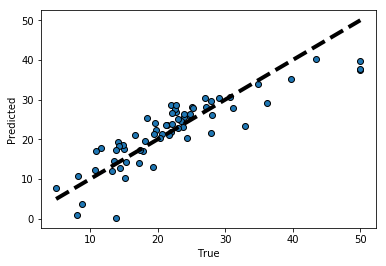

In [32]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')

### Additional Evaluation - Cross Validation 
Cross validation is popular technique used to evaluate a machine learining model. It is particularly usefull in finding out if the model has overfit the training data or not. 

In [33]:
from sklearn.model_selection import cross_val_predict

In [34]:
prediction = cross_val_predict(lr,X_train,y_train,cv=10)

In [35]:
prediction.shape

(266,)

Text(0,0.5,'Predicted')

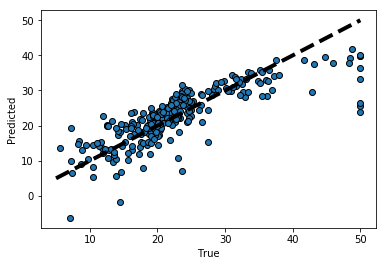

In [36]:
fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('True')
ax.set_ylabel('Predicted')

We can see that our model is definietly not overfitting the training set, therefore we can still increase the complexity of the model to improve the performance.

### Building a more complex model. 

Now, We can build a slightly more complex ploynomial regression model and see how that performs. 

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly_reg = PolynomialFeatures(degree = 3)

In [39]:
X_poly_train = poly_reg.fit_transform(X_train)

In [40]:
poly_reg.fit(X_poly_train, y_train)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [41]:
lr_2 = LinearRegression()

In [42]:
lr_2.fit(X_poly_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### Predicting

In [44]:
X_poly_test = poly_reg.fit_transform(X_test)

In [45]:
y_pred_2 = lr_2.predict(X_poly_test)

#### Evaluating

In [46]:
from sklearn.metrics import mean_absolute_error,r2_score

In [48]:
print('MAE:',mean_absolute_error(y_test,y_pred_2))

MAE: 26.6408121893088


In [49]:
print('R2 Sccore:',r2_score(y_test,y_pred_2))

R2 Sccore: -28.160790589516722


We can see that the performance of the model went down. This is clear sign of overfitting. 